In [110]:
import pandas as pd

In [111]:
import numpy as np

In [112]:
import matplotlib.pyplot as plt

%matplotlib inline

In [113]:
import seaborn as sns

In [114]:
raw_data = pd.read_csv('Bias_correction_ucl - Copy.csv', nrows=5000)
raw_data = raw_data.round(decimals=3)
raw_data.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1,2013-06-30,28.7,21.4,58.256,91.116,28.074,23.007,6.819,69.452,...,0.0,0.0,0.0,37.605,126.991,212.335,2.785,5992.896,29.1,21.2
1,2,2013-06-30,31.9,21.6,52.263,90.605,29.851,24.035,5.692,51.937,...,0.0,0.0,0.0,37.605,127.032,44.762,0.514,5869.312,30.5,22.5
2,3,2013-06-30,31.6,23.3,48.690,83.974,30.091,24.566,6.138,20.573,...,0.0,0.0,0.0,37.578,127.058,33.307,0.266,5863.556,31.1,23.9
3,4,2013-06-30,32.0,23.4,58.240,96.484,29.705,23.326,5.650,65.727,...,0.0,0.0,0.0,37.645,127.022,45.716,2.535,5856.965,31.7,24.3
4,5,2013-06-30,31.4,21.9,56.174,90.155,29.114,23.486,5.735,107.966,...,0.0,0.0,0.0,37.551,127.135,35.038,0.505,5859.552,31.2,22.5


In [115]:
x = raw_data[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS','LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4','LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon','DEM', 'Slope', 'Next_Tmax', 'Next_Tmin']].values
y = raw_data['Solar radiation'].values

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [118]:
from sklearn.linear_model import LinearRegression

In [119]:
model = LinearRegression()

In [120]:
model.fit(x_train, y_train)

LinearRegression()

In [121]:
print(model.coef_)

[-8.15681172e-01  7.80905505e+00 -1.82541571e+01  1.03697141e+01
 -7.18440010e+00  4.62217102e+01 -5.60251317e+01  3.68685826e+01
 -6.35709242e-01  7.16091707e+02 -2.62689113e+02  3.91619979e+01
  1.44343250e+02 -1.91539214e+01 -7.26861464e+00 -2.97210783e+01
  1.25680927e+01  1.43565285e+02 -7.93136199e+00  3.48882303e-01
 -1.76334438e+01  2.37038284e+01 -5.16606959e+00]


In [122]:
print(model.intercept_)

175.47735415159877


In [123]:
pd.DataFrame(model.coef_, columns = ['Coeff'])

,Coeff
0,-0.815681
1,7.809055
2,-18.254157
3,10.369714
4,-7.184400
5,46.221710
6,-56.025132
7,36.868583
8,-0.635709
9,716.091707


In [124]:
predictions = model.predict(x_test)

Text(0, 0.5, 'Predicted')

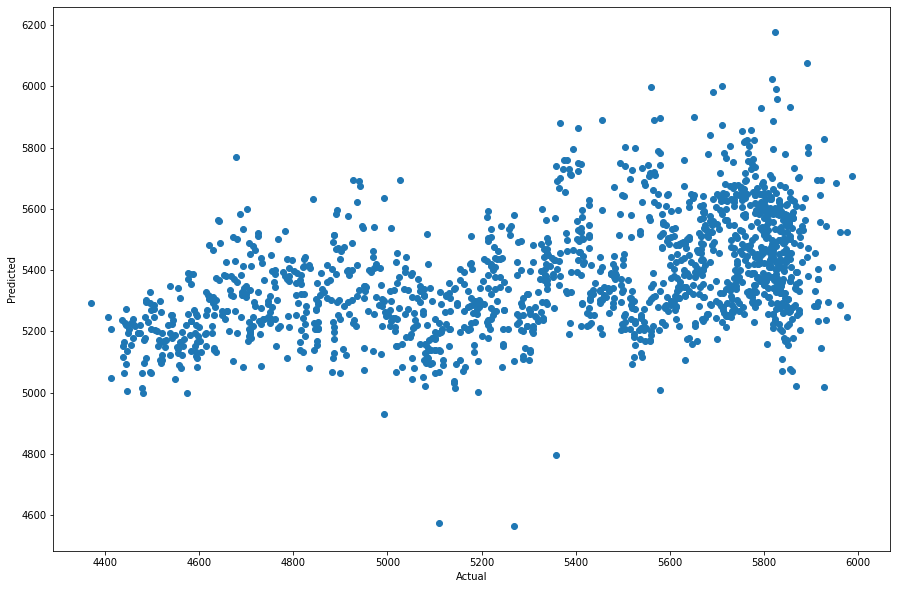

In [125]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')


(array([  6.,  84., 175., 139., 185., 265., 310., 259.,  69.,   8.]),
 array([-1089.16358533,  -889.34295606,  -689.52232679,  -489.70169752,
         -289.88106825,   -90.06043898,   109.76019028,   309.58081955,
          509.40144882,   709.22207809,   909.04270736]),
 <BarContainer object of 10 artists>)

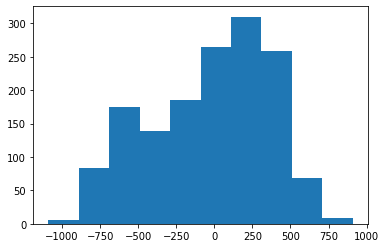

In [126]:
plt.hist(y_test - predictions)

In [127]:
from sklearn import metrics

In [128]:
metrics.mean_absolute_error(y_test, predictions)

325.7790774690979

In [129]:
metrics.mean_squared_error(y_test, predictions)

152941.96118177866

In [130]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

391.0779477057977